## Task 2
### In this task you will work with data collected from our wheeled robot , check How_data_collected_for_Task_2.ipynb for more info.
### You have 7 txt files (0.txt to 6.txt) each represent a step
### build a map of the robot at each step independently using the code provided in Task 1 ( taken from http://ais.informatik.uni-freiburg.de/teaching/ss20/robotics/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi = math.pi
#arr[]=np.array()

In [2]:
for i in range(7):### loop opens each file and prints number of measurments
    
    with open(str(i)+'.txt') as f:
        line_1 = f.readline()
        line_as_list=line_1.split('\t')
        arr = np.array(line_as_list)
        print(len(arr))
    f.close()
##### print  

99
73
107
66
122
99
56


In [3]:

## oppen one file and review data in array arr
with open(str(i)+'.txt') as f:
    line_1 = f.readline()
    line_as_list=line_1.split('\t')
    arr = np.array(line_as_list)
    print(len(arr))
    print(arr[0])# 
f.close()


56
(15, 280.296875, 1203.0)


###  What does (15, 280.296875, 1203.0) mean (check https://rplidar.readthedocs.io/en/latest/ for more info)
#### First value (mostly 15 ) is  quality : int which is  Reflected laser pulse strength

#### Second value is  angle : float which is the measurment heading angle in degree unit [0, 360)

#### Third value is  distance : float Measured object distance related to the sensor’s rotation center. In millimeter unit. Set to 0 when measurment is invalid.

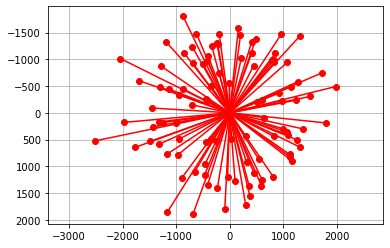

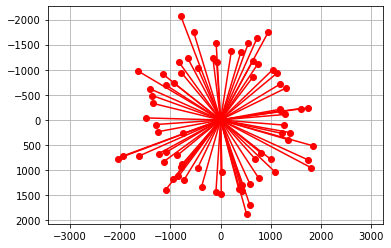

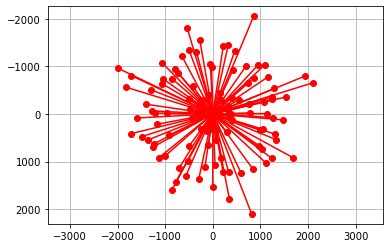

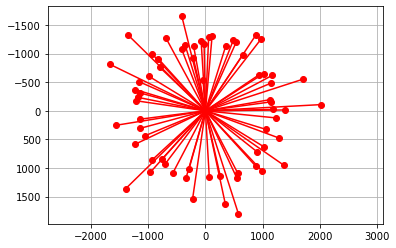

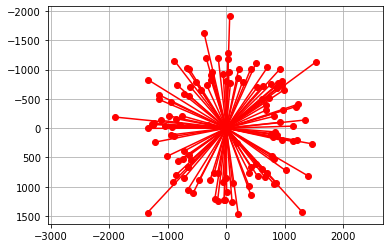

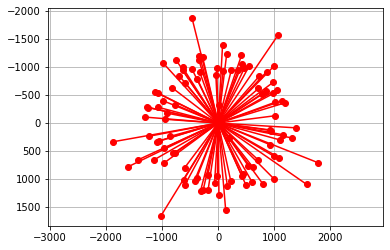

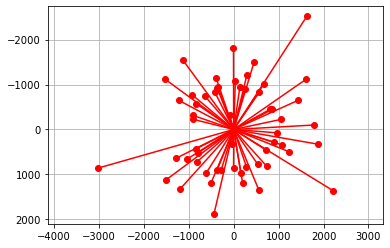

In [4]:
## Here comes your code 
for Y in range(7):
    measure = [line.split(",") for line in open(f'{Y}.csv', 'r')]

    angles = []
    distances = []

    for x in measure:
        angles.append(float(x[1]))
        distances.append(float(x[2]))

    ang = np.array(angles)
    dist = np.array(distances)
    # ang, dist = draw(f'{Y}.csv')

    ox = np.sin(ang) * dist
    oy = np.cos(ang) * dist

    # plt.figure(figsize=(3000, 3000))
    plt.plot([oy, np.zeros(np.size(oy))], [ox, np.zeros(
        np.size(oy))], "ro-")  # from 0.0 to point ox,oy

    plt.axis("equal")

    bottom, top = plt.ylim()  # return current ylim
    plt.ylim((top, bottom))  # set ylimn to top bot
    plt.grid(True)
    plt.show()
## generate occupancy gird map from each step